In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Delhi_climate.csv')
dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
dataset = dataset.values
temp_values = dataset[:,1]
print(temp_values[:5])

[10.0 7.4 7.166666666666668 8.666666666666666 6.0]


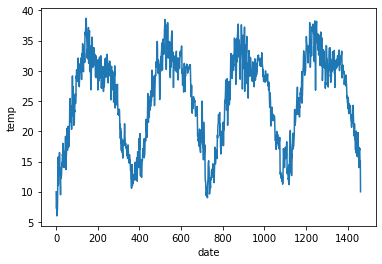

In [3]:
from matplotlib import pyplot as plt

plt.plot(temp_values)
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

In [4]:
print(temp_values.shape)

(1462,)


In [5]:
temp_values = temp_values.reshape(-1,1)
print(temp_values.shape)

(1462, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_temp_values = scaler.fit_transform(temp_values) 

print(temp_values[:5].T)
print(scaled_temp_values[:5].T)

[[10.0 7.4 7.166666666666668 8.666666666666666 6.0]]
[[0.12227074 0.04279476 0.0356623  0.08151383 0.        ]]


In [7]:
data = []
target = []

window_size = 7

for i in range(0,temp_values.shape[0]-window_size):
    data.append(scaled_temp_values[i:i+window_size])
    target.append(scaled_temp_values[i+window_size])

In [8]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1455, 7, 1)
(1455, 1)


In [9]:
np.save('data',data)
np.save('target',target)